# Prinom Mojumder. (2021-2-60-098)
# Suraiya Nusrat Tanha. (2021-2-60-030)
# Tasnim Israk Synthia. (2021-2-60-097)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


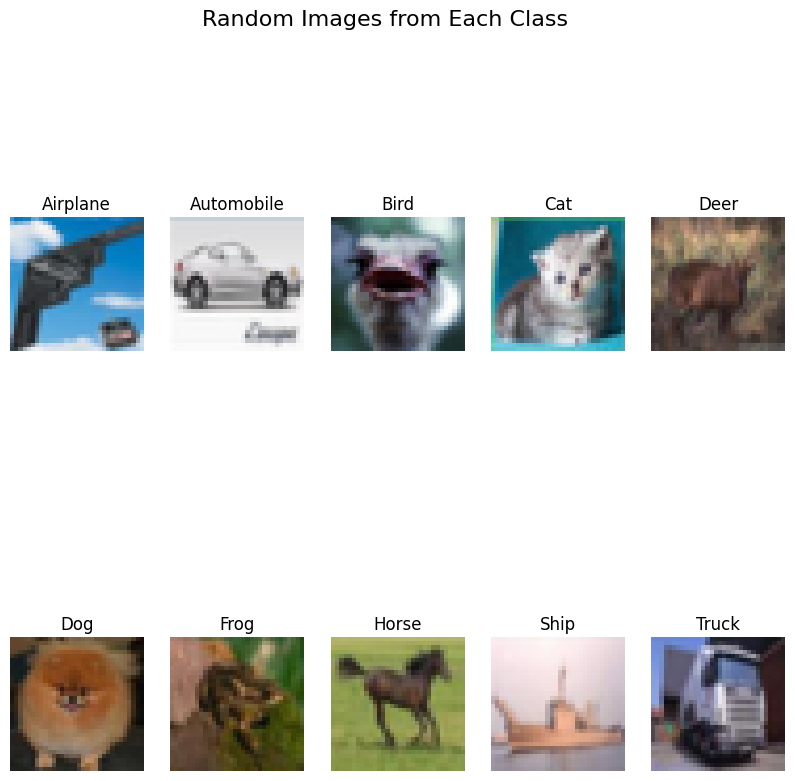

In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Show random images from all classes
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = random.choice(np.where(y_train.flatten() == i)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Random Images from Each Class', fontsize=16)
plt.show()

In [7]:
# Neural Network (NN) model
nn_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile NN model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train NN model
nn_history = nn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2610 - loss: 2.0409 - val_accuracy: 0.3716 - val_loss: 1.7456
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3773 - loss: 1.7209 - val_accuracy: 0.3960 - val_loss: 1.6735
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4153 - loss: 1.6222 - val_accuracy: 0.4194 - val_loss: 1.6410
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4401 - loss: 1.5616 - val_accuracy: 0.4445 - val_loss: 1.5596
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4591 - loss: 1.5095 - val_accuracy: 0.4528 - val_loss: 1.5354
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4769 - loss: 1.4697 - val_accuracy: 0.4531 - val_loss: 1.5337
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4840 - loss: 1.4332 - val_accuracy: 0.4685 - val_loss: 1.4939
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4876 - loss: 1.4170 - val_accuracy: 0.

In [8]:
# CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3093 - loss: 1.8624 - val_accuracy: 0.5176 - val_loss: 1.3368
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5286 - loss: 1.3079 - val_accuracy: 0.5743 - val_loss: 1.2106
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6019 - loss: 1.1248 - val_accuracy: 0.6203 - val_loss: 1.0888
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6432 - loss: 1.0125 - val_accuracy: 0.6432 - val_loss: 1.0151
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6721 - loss: 0.9347 - val_accuracy: 0.6658 - val_loss: 0.9767
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6984 - loss: 0.8604 - val_accuracy: 0.6822 - val_loss: 0.9269
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7160 - loss: 0.8036 - val_accuracy: 0.6900 - val_loss: 0.8942
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7386 - loss: 0.7456 - val_accuracy: 0.

313/313 - 1s - 3ms/step - accuracy: 0.4701 - loss: 1.4890
313/313 - 1s - 3ms/step - accuracy: 0.6992 - loss: 0.8979

Neural Network Test Accuracy: 0.4700999855995178
Convolutional Neural Network Test Accuracy: 0.6991999745368958


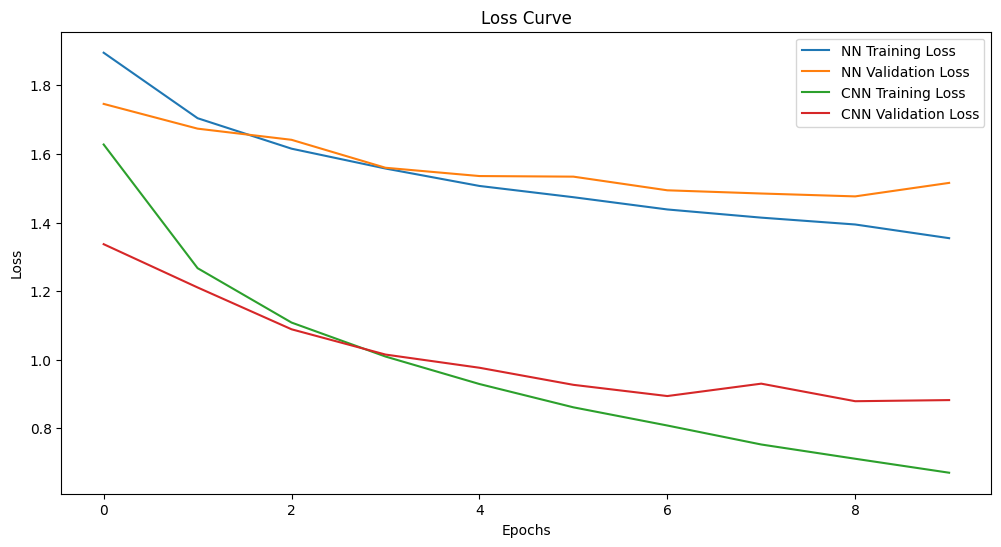

In [9]:
# Evaluate both models
nn_test_loss, nn_test_acc = nn_model.evaluate(x_test, y_test_cat, verbose=2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=2)

print("\nNeural Network Test Accuracy:", nn_test_acc)
print("Convolutional Neural Network Test Accuracy:", cnn_test_acc)

# Plot loss curve for both models
plt.figure(figsize=(12, 6))
plt.plot(nn_history.history['loss'], label='NN Training Loss')
plt.plot(nn_history.history['val_loss'], label='NN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Display model summaries
print("\nNeural Network Model Summary:")
nn_model.summary()

print("\nConvolutional Neural Network Model Summary:")
cnn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)


Convolutional Neural Network Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


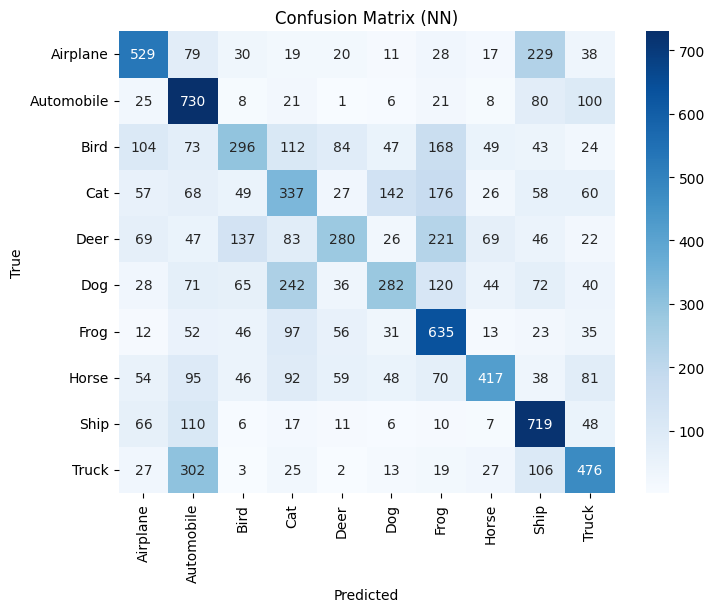


Classification Report (NN):
               precision    recall  f1-score   support

    Airplane       0.54      0.53      0.54      1000
  Automobile       0.45      0.73      0.56      1000
        Bird       0.43      0.30      0.35      1000
         Cat       0.32      0.34      0.33      1000
        Deer       0.49      0.28      0.36      1000
         Dog       0.46      0.28      0.35      1000
        Frog       0.43      0.64      0.51      1000
       Horse       0.62      0.42      0.50      1000
        Ship       0.51      0.72      0.60      1000
       Truck       0.52      0.48      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



In [11]:
# Show confusion matrix and classification report for NN
y_pred_nn = np.argmax(nn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (NN)')
plt.show()

report = classification_report(y_true, y_pred_nn, target_names=class_names)
print("\nClassification Report (NN):\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


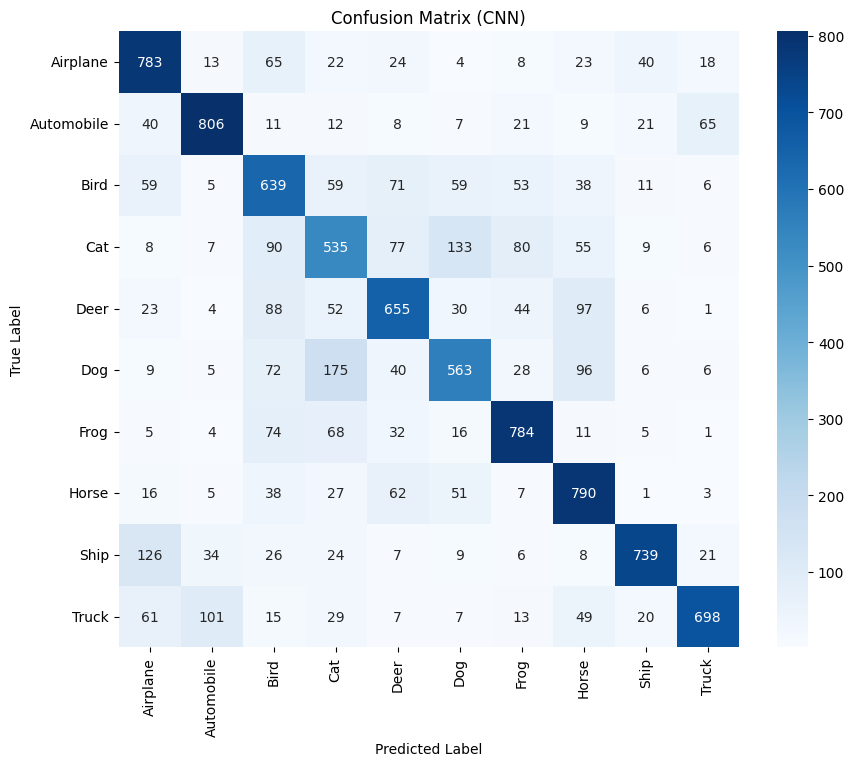


Classification Report (CNN):
               precision    recall  f1-score   support

    Airplane       0.69      0.78      0.74      1000
  Automobile       0.82      0.81      0.81      1000
        Bird       0.57      0.64      0.60      1000
         Cat       0.53      0.54      0.53      1000
        Deer       0.67      0.66      0.66      1000
         Dog       0.64      0.56      0.60      1000
        Frog       0.75      0.78      0.77      1000
       Horse       0.67      0.79      0.73      1000
        Ship       0.86      0.74      0.80      1000
       Truck       0.85      0.70      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [12]:
# Show confusion matrix and classification report for CNN
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_true, y_pred_cnn, target_names=class_names)
print("\nClassification Report (CNN):\n", report)

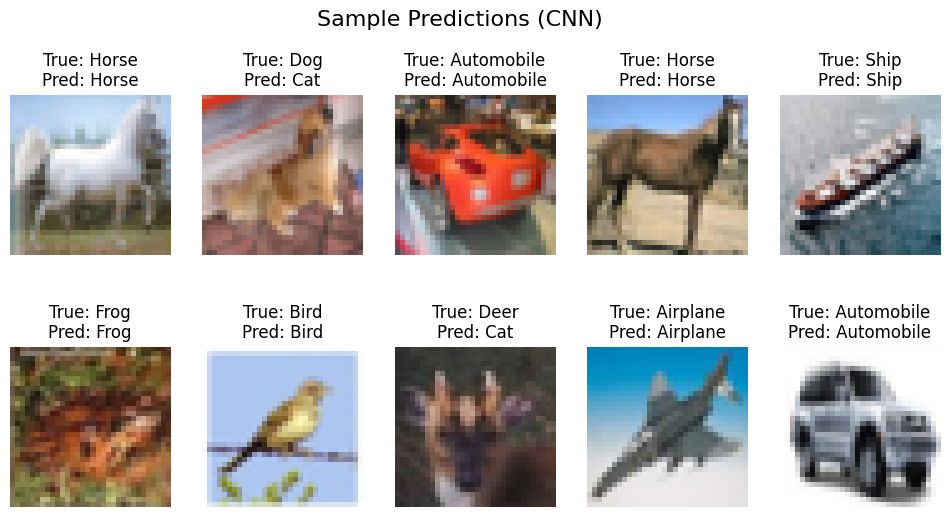

In [13]:
# Show a few predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPred: {class_names[y_pred_cnn[idx]]}")
    plt.axis('off')
plt.suptitle('Sample Predictions (CNN)', fontsize=16)
plt.show()

*italicized text*# **Group-wise Tasks**
*You must not change the basic structure of the given code.*

**Task 1**: Modify the CNN architecture (e.g., add more Convolution/Pooling/Dense/dropout/Batch Normalization layers, change kernel sizes) and report the performance impact. (Modified Architecture should provide a better performance, Benchmark Performance - CNN Test Accuracy: 0.6873999834060669)

**Task 2**: Use FASHION-MNIST Dataset and Report the performance of your CNN model (Test Accuracy) built for Task 1. You may use padding in the first convolution layer to get the appropriate output shape.

**Task 3**: Can you improve the performace of your CNN Model used for Task 2? If yes, what have you changed? Report the test accuracy.

**Task 4**: Apply a pre-trained model over FASHION-MNIST Dataset and compare the performance of your CNN model and the pre-trained model.  

**Show your obtained result during the lab and submit a formal report on these tasks after the lab.**



# Task: 1

In [19]:
# Modified CNN model
modified_cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the modified CNN model
modified_cnn_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified CNN model
modified_cnn_history = modified_cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the modified CNN model
modified_cnn_test_loss, modified_cnn_test_acc = modified_cnn_model.evaluate(x_test, y_test_cat, verbose=2)

print("\nModified CNN Test Accuracy:", modified_cnn_test_acc)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3448 - loss: 2.1191 - val_accuracy: 0.5827 - val_loss: 1.1769
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5713 - loss: 1.1983 - val_accuracy: 0.6601 - val_loss: 0.9459
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6538 - loss: 0.9810 - val_accuracy: 0.7308 - val_loss: 0.7627
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7064 - loss: 0.8393 - val_accuracy: 0.7219 - val_loss: 0.7945
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7324 - loss: 0.7590 - val_accuracy: 0.7550 - val_loss: 0.6976
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7584 - loss: 0.6934 - val_accuracy: 0.7527 - val_loss: 0.7226
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7759 - loss: 0.6507 - val_accuracy: 0.7668 - val_loss: 0.6825
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7954 - loss: 0.5911 - val_accuracy: 

313/313 - 0s - 2ms/step - accuracy: 0.6992 - loss: 0.8979

Original CNN Test Accuracy: 0.6991999745368958
313/313 - 1s - 2ms/step - accuracy: 0.8021 - loss: 0.5726
Modified CNN Test Accuracy: 0.8021000027656555


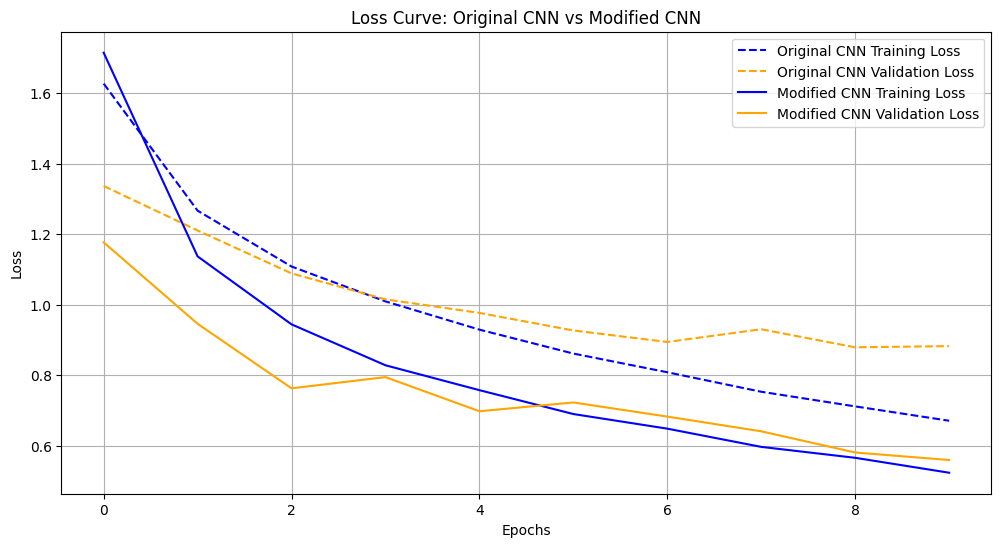


Summary of Test Accuracies:
Original CNN Test Accuracy: 0.6992
Modified CNN Test Accuracy: 0.8021


In [20]:
# Evaluate the original CNN model
original_cnn_test_loss, original_cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=2)
print("\nOriginal CNN Test Accuracy:", original_cnn_test_acc)

# Evaluate the modified CNN model
modified_cnn_test_loss, modified_cnn_test_acc = modified_cnn_model.evaluate(x_test, y_test_cat, verbose=2)
print("Modified CNN Test Accuracy:", modified_cnn_test_acc)

# Plot loss curves for both models
plt.figure(figsize=(12, 6))

# Original CNN loss curves
plt.plot(cnn_history.history['loss'], label='Original CNN Training Loss', linestyle='--', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Original CNN Validation Loss', linestyle='--', color='orange')

# Modified CNN loss curves
plt.plot(modified_cnn_history.history['loss'], label='Modified CNN Training Loss', color='blue')
plt.plot(modified_cnn_history.history['val_loss'], label='Modified CNN Validation Loss', color='orange')

# Formatting the plot
plt.title('Loss Curve: Original CNN vs Modified CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print summary of test accuracies
print("\nSummary of Test Accuracies:")
print(f"Original CNN Test Accuracy: {original_cnn_test_acc:.4f}")
print(f"Modified CNN Test Accuracy: {modified_cnn_test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


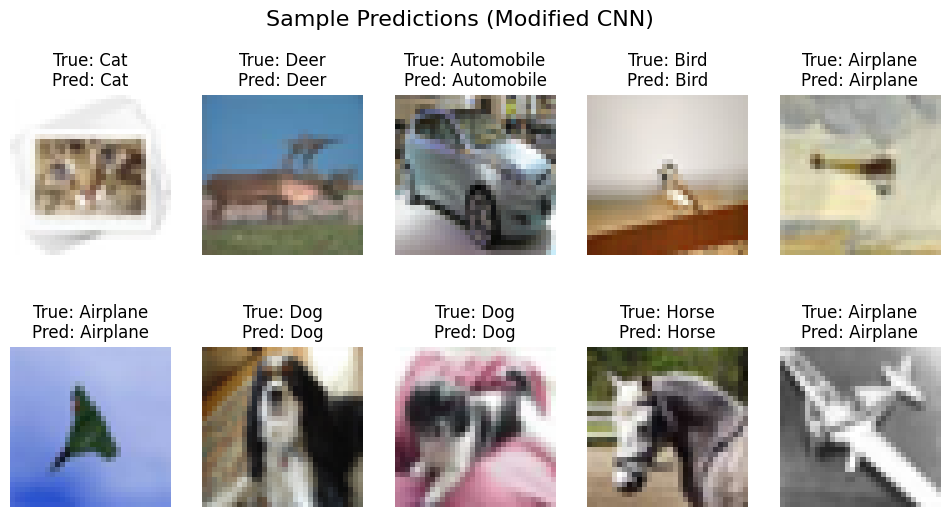

In [21]:
# Generate predictions for the test set using the modified CNN model
y_pred_modified_cnn = modified_cnn_model.predict(x_test)
y_pred_modified_cnn_classes = np.argmax(y_pred_modified_cnn, axis=1)

# Show a few predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)  # Randomly select an image index
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])  # Show the test image
    true_label = class_names[y_test[idx][0]]  # Get the true label
    pred_label = class_names[y_pred_modified_cnn_classes[idx]]  # Get the predicted label
    plt.title(f"True: {true_label}\nPred: {pred_label}")  # Display labels
    plt.axis('off')

plt.suptitle('Sample Predictions (Modified CNN)', fontsize=16)
plt.show()


# Task: 2

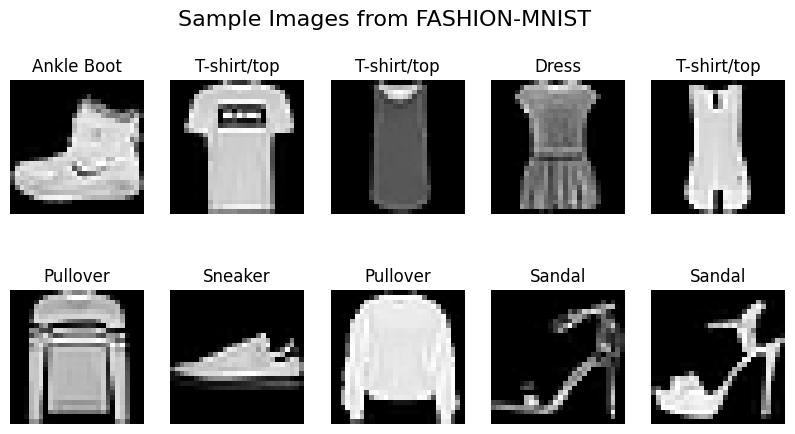

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the FASHION-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (grayscale)
x_train = x_train[..., np.newaxis]  # Shape: (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]    # Shape: (10000, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for FASHION-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle('Sample Images from FASHION-MNIST', fontsize=16)
plt.show()


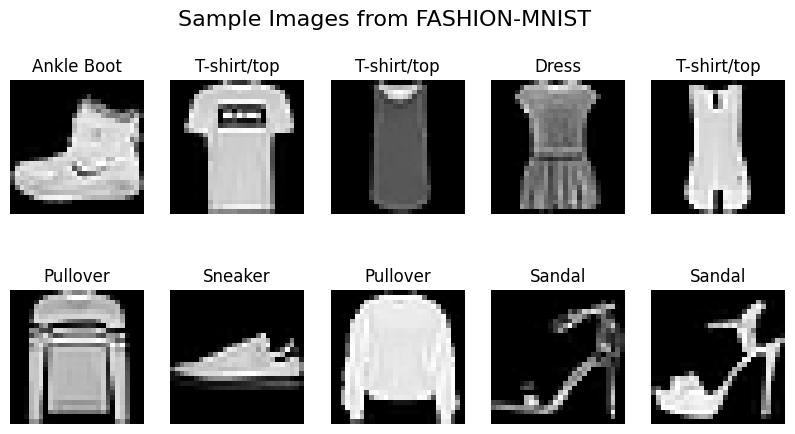

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7075 - loss: 0.9004 - val_accuracy: 0.8319 - val_loss: 0.4553
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8653 - loss: 0.3747 - val_accuracy: 0.8888 - val_loss: 0.2976
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8882 - loss: 0.3147 - val_accuracy: 0.9085 - val_loss: 0.2500
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9012 - loss: 0.2732 - val_accuracy: 0.9004 - val_loss: 0.2708
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9105 - loss: 0.2501 - val_accuracy: 0.9130 - val_loss: 0.2379
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9127 - loss: 0.2378 - val_accuracy: 0.9210 - val_loss: 0.2209
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9202 - loss: 0.2237 - val_accuracy: 0.9227 - val_loss: 0.2112
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9216 - loss: 0.2167 - val_accuracy: 0

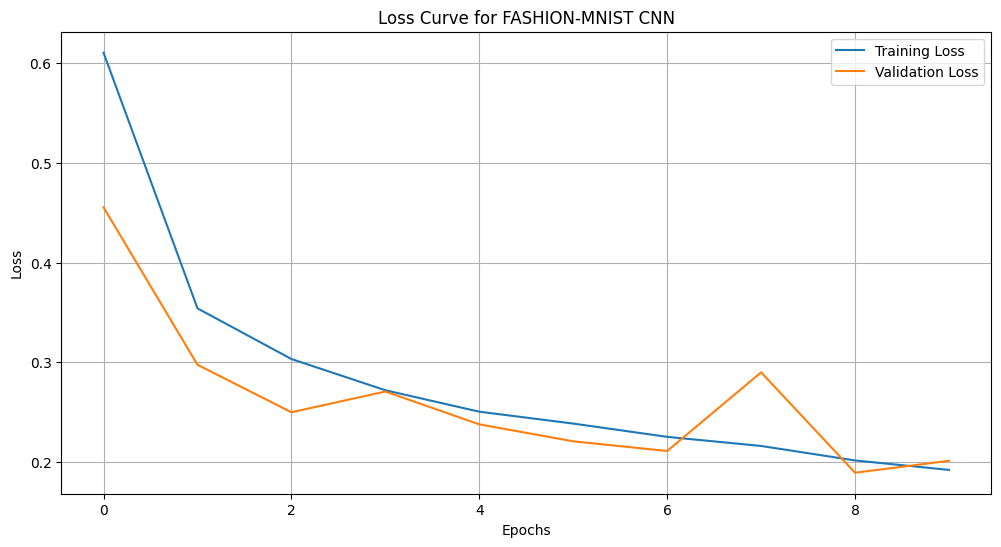

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the FASHION-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (grayscale)
x_train = x_train[..., np.newaxis]  # Shape: (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]    # Shape: (10000, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for FASHION-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle('Sample Images from FASHION-MNIST', fontsize=16)
plt.show()

# Modified CNN model (Task 1 with minor changes for FASHION-MNIST)
fashion_cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Updated input shape for grayscale images
    
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
fashion_cnn_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Train the model
fashion_cnn_history = fashion_cnn_model.fit(x_train, y_train_cat,
                                            epochs=10,
                                            batch_size=64,
                                            validation_split=0.2)

# Evaluate the model on the test set
fashion_cnn_test_loss, fashion_cnn_test_acc = fashion_cnn_model.evaluate(x_test, y_test_cat, verbose=2)

# Report the test accuracy
print("\nFASHION-MNIST CNN Test Accuracy:", fashion_cnn_test_acc)

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(fashion_cnn_history.history['loss'], label='Training Loss')
plt.plot(fashion_cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for FASHION-MNIST CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


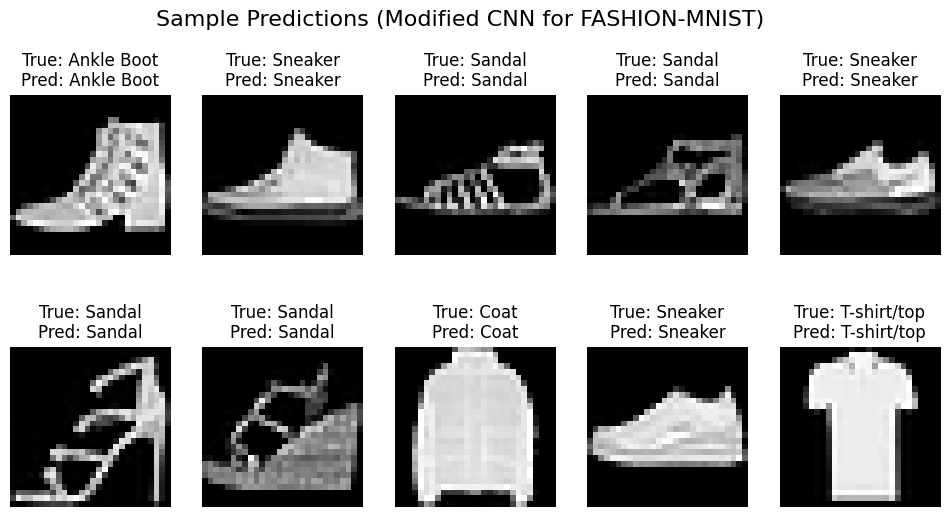

In [33]:
# Generate predictions for the test set using the modified CNN model
y_pred_fashion_cnn = fashion_cnn_model.predict(x_test)
y_pred_fashion_cnn_classes = np.argmax(y_pred_fashion_cnn, axis=1)

# Show a few predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)  # Randomly select an image index
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')  # Show the test image in grayscale
    true_label = class_names[y_test[idx]]  # Get the true label
    pred_label = class_names[y_pred_fashion_cnn_classes[idx]]  # Get the predicted label
    plt.title(f"True: {true_label}\nPred: {pred_label}")  # Display labels
    plt.axis('off')

plt.suptitle('Sample Predictions (Modified CNN for FASHION-MNIST)', fontsize=16)
plt.show()


# Task: 3

Epoch 1/30
938/938 - 23s - 25ms/step - accuracy: 0.7070 - loss: 0.8463 - val_accuracy: 0.8482 - val_loss: 0.4091
Epoch 2/30
938/938 - 6s - 7ms/step - accuracy: 0.8400 - loss: 0.4453 - val_accuracy: 0.8750 - val_loss: 0.3418
Epoch 3/30
938/938 - 6s - 7ms/step - accuracy: 0.8732 - loss: 0.3583 - val_accuracy: 0.8943 - val_loss: 0.2929
Epoch 4/30
938/938 - 6s - 7ms/step - accuracy: 0.8896 - loss: 0.3127 - val_accuracy: 0.8907 - val_loss: 0.2976
Epoch 5/30
938/938 - 6s - 7ms/step - accuracy: 0.8990 - loss: 0.2882 - val_accuracy: 0.9041 - val_loss: 0.2686
Epoch 6/30
938/938 - 7s - 7ms/step - accuracy: 0.9059 - loss: 0.2687 - val_accuracy: 0.9040 - val_loss: 0.2643
Epoch 7/30
938/938 - 7s - 7ms/step - accuracy: 0.9119 - loss: 0.2493 - val_accuracy: 0.9233 - val_loss: 0.2168
Epoch 8/30
938/938 - 6s - 7ms/step - accuracy: 0.9170 - loss: 0.2369 - val_accuracy: 0.9240 - val_loss: 0.2149
Epoch 9/30
938/938 - 7s - 7ms/step - accuracy: 0.9223 - loss: 0.2216 - val_accuracy: 0.9183 - val_loss: 0.2215

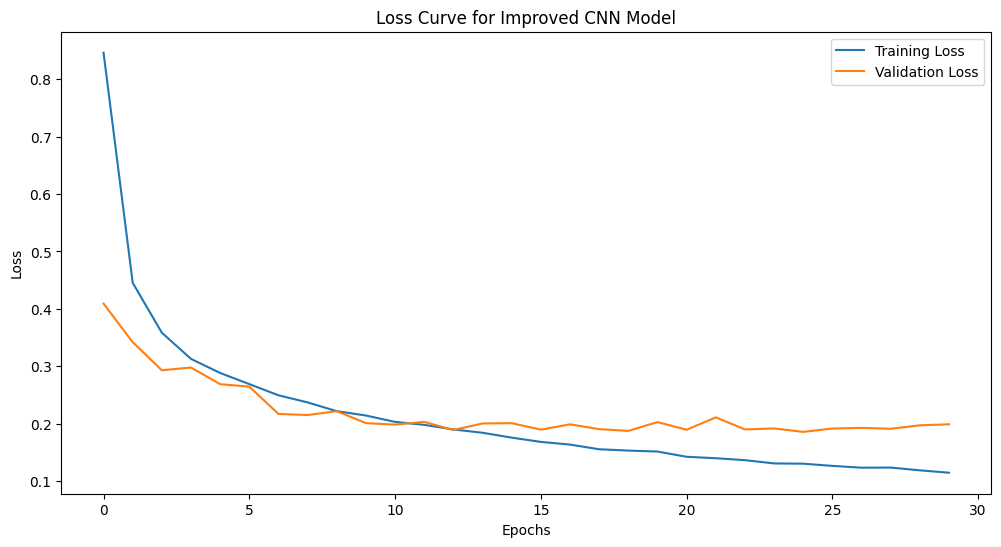

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

# Load FASHION-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define class names for FASHION-MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

# Improved CNN Model Architecture
improved_fashion_cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Grayscale input

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
improved_fashion_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
improved_fashion_cnn_history = improved_fashion_cnn_model.fit(
    x_train, y_train_cat,
    epochs=30, batch_size=64,
    validation_data=(x_test, y_test_cat),
    verbose=2
)

# Evaluate the improved model
improved_fashion_cnn_test_loss, improved_fashion_cnn_test_acc = improved_fashion_cnn_model.evaluate(x_test, y_test_cat, verbose=2)

# Report the test accuracy
print("\nImproved FASHION-MNIST CNN Test Accuracy:", improved_fashion_cnn_test_acc)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(improved_fashion_cnn_history.history['loss'], label='Training Loss')
plt.plot(improved_fashion_cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Improved CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Task: 4

In [34]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the FASHION-MNIST dataset for MobileNetV2
x_train_resized = np.repeat(x_train, 3, axis=-1)  # Convert grayscale to RGB
x_test_resized = np.repeat(x_test, 3, axis=-1)    # Convert grayscale to RGB
x_train_resized = tf.image.resize(x_train_resized, (96, 96))  # Resize for MobileNetV2
x_test_resized = tf.image.resize(x_test_resized, (96, 96))    # Resize for MobileNetV2

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replace flattening with GAP for better generalization
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)  # Output layer for 10 classes

# Create the model
pretrained_model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
pretrained_history = pretrained_model.fit(
    x_train_resized, y_train_cat,
    epochs=10, batch_size=64,
    validation_data=(x_test_resized, y_test_cat),
    verbose=2
)

# Evaluate the model
pretrained_test_loss, pretrained_test_acc = pretrained_model.evaluate(x_test_resized, y_test_cat, verbose=2)

# Compare results
print("\nCustom CNN Test Accuracy:", fashion_cnn_test_acc)
print("Pre-Trained Model Test Accuracy:", pretrained_test_acc)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
938/938 - 30s - 32ms/step - accuracy: 0.8654 - loss: 0.3700 - val_accuracy: 0.8789 - val_loss: 0.3312
Epoch 2/10
938/938 - 14s - 15ms/step - accuracy: 0.9000 - loss: 0.2698 - val_accuracy: 0.8922 - val_loss: 0.2942
Epoch 3/10
938/938 - 14s - 15ms/step - accuracy: 0.9107 - loss: 0.2360 - val_accuracy: 0.8900 - val_loss: 0.2955
Epoch 4/10
938/938 - 14s - 15ms/step - accuracy: 0.9225 - loss: 0.2089 - val_accuracy: 0.8987 - val_loss: 0.2823
Epoch 5/10
938/938 - 14s - 15ms/step - accuracy: 0.9301 - loss: 0.1869 - val_accuracy: 0.9003 - val_loss: 0.2824
Epoch 6/10
938/938 - 14s - 14ms/step - accuracy: 0.9372 - loss: 0.1661 - val_accuracy: 0.9026 - val_loss: 0.2725
Epoch 7/10
938/938 - 14s - 14ms/step - accuracy: 0.9442 - loss: 0.1477 - val_accuracy: 0.8969 - val_loss: 0.3045
Epoch 8/10
938/938 - 14s - 14ms/step - accuracy: 0.9505 - loss: 0.1317 - val_accuracy: 0.8960 - val_loss: 0.3180
Epoch 9/10
938/938 - 14s - 15ms/step - accuracy

In [37]:
# Compare results
print("\nCustom CNN Test Accuracy (Task 2):", fashion_cnn_test_acc) 
print("Improved CNN Test Accuracy (Task 3):", improved_fashion_cnn_test_acc) 
print("Pre-Trained Model Test Accuracy (Task 4: MobileNetV2):", pretrained_test_acc)



Custom CNN Test Accuracy (Task 2): 0.9247000217437744
Improved CNN Test Accuracy (Task 3): 0.9362000226974487
Pre-Trained Model Test Accuracy (Task 4: MobileNetV2): 0.8988999724388123
